In [12]:
import pandas as pd
import numpy as np
from IPython.display import display
import os


# DATA CLEANING  

This section prepares all datasets for analysis and modeling.  
It includes:  
- Loading raw data sources  
- Cleaning and standardizing column formats  
- Transforming percentages into proportions  
- Normalizing skewed variables (e.g., hospital beds)  
- Combining multiple feature datasets into a single master dataframe for modeling  

---


### Data Loading

This block loads the raw datasets required for analysis. Each CSV file is read into a separate Pandas DataFrame:

- **base_df** → Given sample csv with Covid Fatality Rate
- **general_stats_df** → County-level health statistics  
- **main_pct_df** → Pre-processed percentages for modeling, a extracted version from general_stats_df that has important stats
- **covid_data_df** → COVID-19 vaccination dataset  
- **socio_demo_df** → Socio-demographic dataset from the CDC SVI  

The `display()` calls are used to preview each dataset after loading.


In [4]:
base_df = pd.read_csv("../RAW_DATA/flinfo2022.csv")
general_stats_df = pd.read_csv("../RAW_DATA/flhealthcharts_summary_2021_wide_snake.csv")
main_pct_df = pd.read_csv("../RAW_DATA/flhealthcharts_model_ready_full.csv")
covid_data_df = pd.read_csv("../RAW_DATA/covid_vaccine_data.csv")
socio_demo_df = pd.read_csv("../RAW_DATA/Florida_county_demographic.csv")
display(base_df)
display(general_stats_df)
display(main_pct_df)
display(covid_data_df)
display(socio_demo_df)

/var/folders/f7/8lj731gd5tl0gjqryfsfhwdh0000gn/T/ipykernel_19160/282473877.py:4: DtypeWarning: Columns (8,18,20,28,30,32,34,36,38,67,68,71,72,74,76,78) have mixed types. Specify dtype option on import or set low_memory=False.
  covid_data_df = pd.read_csv("../RAW_DATA/covid_vaccine_data.csv")


,Unnamed: 0,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,lethality,population
0,1014,12001,Alachua,Florida,US,2022-09-19 04:21:49,29.678665,-82.359282,83415,733,NaN,NaN,"Alachua, Florida, US",31004.337597,0.878739,0.008787,269043.0
1,1015,12003,Baker,Florida,US,2022-09-19 04:21:49,30.330601,-82.284675,9940,146,NaN,NaN,"Baker, Florida, US",34029.441972,1.468813,0.014688,29210.0
2,1016,12005,Bay,Florida,US,2022-09-19 04:21:49,30.265487,-85.621226,53174,850,NaN,NaN,"Bay, Florida, US",30436.450016,1.598526,0.015985,174705.0
3,1017,12007,Bradford,Florida,US,2022-09-19 04:21:49,29.950797,-82.166116,8669,167,NaN,NaN,"Bradford, Florida, US",30740.044679,1.926404,0.019264,28201.0
4,1018,12009,Brevard,Florida,US,2022-09-19 04:21:49,28.294095,-80.730910,164771,2307,NaN,NaN,"Brevard, Florida, US",27373.235295,1.400125,0.014001,601942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1077,12125,Union,Florida,US,2022-09-19 04:21:49,30.044130,-82.374974,4872,120,NaN,NaN,"Union, Florida, US",31974.798189,2.463054,0.024631,15237.0
64,1078,12127,Volusia,Florida,US,2022-09-19 04:21:49,29.058589,-81.182633,141754,2152,NaN,NaN,"Volusia, Florida, US",25620.477006,1.518123,0.015181,553284.0
65,1079,12129,Wakulla,Florida,US,2022-09-19 04:21:49,30.165489,-84.398952,11507,132,NaN,NaN,"Wakulla, Florida, US",34105.930822,1.147128,0.011471,33739.0
66,1080,12131,Walton,Florida,US,2022-09-19 04:21:49,30.642040,-86.169357,19646,222,NaN,NaN,"Walton, Florida, US",26523.200713,1.130001,0.011300,74071.0


,county,year,adults_who_are_current_smokers,adults_who_are_former_smokers,adults_who_are_inactive_or_insufficiently_active3,adults_who_are_obese3,adults_who_are_overweight3,adults_who_are_sedentary,adults_who_could_not_see_a_doctor_in_the_past_year_due_to_cost,adults_who_had_poor_physical_health_on_14_or_more_of_the_past_30_days,...,syphilis_infectious9,tetanus9,total_population1,tuberculosis_tb_9,unemployed_civilian_labor_force2,varicella9,vibriosis_excluding_cholera,white1,women_who_received_a_mammogram_in_the_past_year_aged_40_years_and_older_3,women_who_received_a_pap_test_in_the_past_year_aged_18_years_and_older_3
0,Alachua,2021,11.4,18.6,51.7,29.8,27.5,21.8,13.8,8.3,...,25.1,0,275435,2.1,4.8,1.6,2.5,192565,55.8,49.5
1,Baker,2021,29.7,26.0,61.7,36.4,34.3,34.9,21.8,22.0,...,10.5,0,28790,0.0,5.1,9.4,0.0,23714,56.6,37.7
2,Bay,2021,22.1,26.8,60.6,29.9,36.4,29.7,16.4,14.9,...,13.9,0,176851,1.9,4.6,1.7,2.0,145075,55.3,50.5
3,Bradford,2021,27.1,21.0,53.7,35.8,30.4,35.8,18.3,18.4,...,7.0,0,28824,0.0,5.0,1.2,0.0,22033,46.5,41.4
4,Brevard,2021,16.3,29.3,53.0,30.7,36.6,27.9,15.9,16.0,...,19.1,1,618491,1.4,4.8,1.5,1.3,513098,58.6,48.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Union,2021,32.4,21.8,57.3,38.9,35.9,26.4,21.4,22.5,...,21.3,0,15439,6.4,3.4,6.4,2.1,11443,54.6,41.7
63,Volusia,2021,18.5,30.0,58.2,35.5,30.7,25.1,17.6,15.2,...,16.1,1,564112,1.2,4.2,2.7,1.5,471237,55.7,43.3
64,Wakulla,2021,21.4,28.4,54.8,37.9,36.7,33.8,13.2,11.2,...,13.9,0,34829,0.0,3.3,1.0,2.0,28713,67.4,54.0
65,Walton,2021,28.6,27.6,56.0,34.3,37.9,31.4,21.0,19.7,...,4.0,0,79376,1.3,4.6,0.0,3.3,71148,52.3,43.2


,county,year,pop_65plus,pop_total,obesity_pct,diabetes_deaths,smoking_pct,sedentary_pct,poverty_pct,hospital_beds,overweight_pct,pct_65plus
0,Alachua,2021,41738,275435,29.8,23.7,11.4,21.8,20.1,633.9,27.5,15.153484
1,Baker,2021,4216,28790,36.4,25.3,29.7,34.9,11.7,1419.3,34.3,14.643974
2,Bay,2021,33388,176851,29.9,29.9,22.1,29.7,12.9,415.2,36.4,18.879169
3,Bradford,2021,5286,28824,35.8,28.6,27.1,35.8,19.4,17.4,30.4,18.338884
4,Brevard,2021,151297,618491,30.7,20.1,16.3,27.9,10.6,314.9,36.6,24.462280
...,...,...,...,...,...,...,...,...,...,...,...,...
62,Union,2021,2368,15439,38.9,26.1,32.4,26.4,17.0,415.6,35.9,15.337781
63,Volusia,2021,143041,564112,35.5,26.9,18.5,25.1,12.9,288.6,30.7,25.356844
64,Wakulla,2021,5635,34829,37.9,14.9,21.4,33.8,6.2,0.0,36.7,16.179046
65,Walton,2021,16317,79376,34.3,17.5,28.6,31.4,12.8,183.6,37.9,20.556591


,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Census2019_18PlusPop,Census2019_65PlusPop,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
0,12/13/2020,12043,51,Glades County,FL,0.0,0,0.0,NaN,NaN,...,"11,823",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/13/2020,12099,51,Palm Beach County,FL,0.0,0,0.0,NaN,NaN,...,"1,212,991",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/13/2020,12077,51,Liberty County,FL,0.0,0,0.0,NaN,NaN,...,"6,902",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12/13/2020,12009,51,Brevard County,FL,0.0,0,0.0,NaN,NaN,...,"492,787",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12/13/2020,12041,51,Gilchrist County,FL,0.0,0,0.0,NaN,NaN,...,"14,885",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40656,05/10/2023,12001,19,Alachua County,FL,98.6,"214,684",79.8,"212,741",83.4,...,"220,754","39,272","46,386",18.2,"45,431",19.3,"43,900",19.9,"19,622",50.0
40657,05/10/2023,12117,19,Seminole County,FL,98.6,"336,645",71.3,"334,969",74.9,...,"373,628","75,401","54,432",12.2,"53,386",13.1,"51,741",13.8,"24,561",32.6
40658,05/10/2023,12027,19,DeSoto County,FL,98.6,"23,056",60.7,"23,034",63.8,...,"30,849","8,558","2,217",6.1,"2,213",6.6,"2,193",7.1,"1,541",18.0
40659,05/10/2023,12129,19,Wakulla County,FL,98.6,"18,632",55.2,"18,578",58.1,...,"26,751","5,366","2,750",8.6,"2,723",9.3,"2,670",10.0,"1,631",30.4


,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
0,12,Florida,FL,12001,Alachua County,12001,"Alachua County, Florida",875.644953,279729,0,...,5.9,0.2,0.2,0.1,0.1,0.1,3.8,0.5,0.5,0.2
1,12,Florida,FL,12003,Baker County,12003,"Baker County, Florida",585.229848,27969,0,...,0.7,0.2,0.2,0.2,0.0,0.2,6.3,1.7,0.0,0.1
2,12,Florida,FL,12005,Bay County,12005,"Bay County, Florida",758.598038,181055,0,...,2.0,0.2,0.2,0.1,0.1,0.1,4.6,0.5,0.7,0.4
3,12,Florida,FL,12007,Bradford County,12007,"Bradford County, Florida",293.965916,27816,0,...,0.9,0.1,0.1,0.1,0.0,0.2,4.4,1.3,0.0,0.1
4,12,Florida,FL,12009,Brevard County,12009,"Brevard County, Florida",1014.972544,610723,0,...,2.3,0.2,0.1,0.1,0.1,0.1,4.2,0.3,0.7,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,12,Florida,FL,12125,Union County,12125,"Union County, Florida",243.554895,15524,0,...,0.1,0.1,0.2,0.2,0.0,0.3,6.4,1.6,0.1,0.1
63,12,Florida,FL,12127,Volusia County,12127,"Volusia County, Florida",1101.115262,558520,0,...,1.8,0.1,0.1,0.1,0.0,0.1,2.6,0.3,0.4,0.1
64,12,Florida,FL,12129,Wakulla County,12129,"Wakulla County, Florida",606.417876,33732,0,...,0.1,0.1,0.2,0.2,0.0,0.1,2.7,0.9,0.3,0.4
65,12,Florida,FL,12131,Walton County,12131,"Walton County, Florida",1038.297476,76618,0,...,1.1,0.2,0.3,0.1,0.0,0.1,4.7,0.7,0.5,0.3


### Vaccination Trajectory Feature Engineering

This function processes the raw COVID-19 vaccination dataset to create **trajectory features** for each county:

- Cleans county names (removes `" County"`, drops `"Unknown"` entries).  
- Filters vaccination records up to a given cutoff date (`present_date`).  
- Keeps only relevant vaccination percentage columns.  
- Converts percentage values into proportions (`0–1`).  
- For each county:
  - Extracts the **final vaccination percentages** (overall, elderly, boosters).  
  - Calculates the **average overall vaccination rate**.  

The output is a new DataFrame (`trajectory_df`) containing one row per county with summarized vaccination trajectory features.


In [5]:
def build_vax_trajectory_features(covid_data_df, present_date="09/19/2022"):
    covid_vax = covid_data_df.copy()
    covid_vax = covid_vax.rename(columns={"Recip_County": "county"})
    covid_vax["county"] = (
        covid_vax["county"].str.replace(" County", "", regex=False).str.strip()
    )
    covid_vax = covid_vax[covid_vax["county"] != "Unknown"]
    covid_vax["Date"] = pd.to_datetime(covid_vax["Date"], format="%m/%d/%Y")
    present_date = pd.to_datetime(present_date, format="%m/%d/%Y")
    covid_vax = covid_vax[covid_vax["Date"] <= present_date]
    covid_vax = covid_vax[
        [
            "county",
            "Date",
            "Series_Complete_Pop_Pct",
            "Series_Complete_65PlusPop_Pct",
            "Booster_Doses_Vax_Pct",
            "Booster_Doses_65Plus_Vax_Pct",
        ]
    ].rename(columns={"Date": "date"})

    trajectory_features = []
    for county, grp in covid_vax.groupby("county"):
        grp = grp.sort_values("date")
        final_full = grp["Series_Complete_Pop_Pct"].iloc[-1] / 100.0
        final_elderly = grp["Series_Complete_65PlusPop_Pct"].iloc[-1] / 100.0
        final_booster = grp["Booster_Doses_Vax_Pct"].iloc[-1] / 100.0
        final_elderly_booster = grp["Booster_Doses_65Plus_Vax_Pct"].iloc[-1] / 100.0
        avg_full = grp["Series_Complete_Pop_Pct"].mean() / 100.0
        trajectory_features.append(
            {
                "county": county,
                "final_full": final_full,
                "final_elderly": final_elderly,
                "final_booster": final_booster,
                "final_elderly_booster": final_elderly_booster,
                "avg_full": avg_full,
            }
        )
    trajectory_df = pd.DataFrame(trajectory_features)
    return trajectory_df


### Cleaning the Base DataFrame

This function standardizes and filters the base dataset:

- Renames the **Admin2** column to **county**.  
- Removes rows where the county is marked as **Unassigned**.  
- Retains only the **county** and **Case_Fatality_Ratio** columns, which are essential for modeling.  

The result is a simplified DataFrame with clean county identifiers and their corresponding case fatality ratios.


In [6]:
def clean_base_df(base_df):
    base_df = base_df.rename(columns={"Admin2": "county"})
    base_df = base_df[base_df["county"] != "Unassigned"]
    base_df = base_df[["county", "Case_Fatality_Ratio"]]
    return base_df


### Function: `normalize_hospital_beds`

This function standardizes the `hospital_beds` column in the dataframe:

- Applies a **log-transform** (`log1p`) to reduce skew and handle zero values safely.  
- Performs **z-score standardization** so the values have mean = 0 and standard deviation = 1.  
- Replaces the original `hospital_beds` column with the normalized values.  
- Returns the updated dataframe.  


In [7]:
def normalize_hospital_beds(df, column='hospital_beds'):
    log_vals = np.log1p(df[column])
    mean_val = log_vals.mean()
    std_val = log_vals.std(ddof=0)
    df[column] = (log_vals - mean_val) / std_val
    return df


### Function: `clean_and_scale`

This function prepares and scales percentage-type columns in the dataframe:

- **Removes unnecessary columns**: drops `pop_65plus`, `pop_total`, and `year` if present.  
- **Scales percentages into proportions**: for every numeric column (except the specified z-score column, e.g. `hospital_beds`), divides values by 100.  
- Works on a copy of the dataframe to avoid altering the original input.  
- Returns the cleaned and scaled dataframe.  


In [8]:
def clean_and_scale(df, zscore_col='hospital_beds'):
    df = df.copy()
    drop_cols = ['pop_65plus', 'pop_total', 'year']
    df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')
    for col in df.select_dtypes(include='number').columns:
        if col != zscore_col:
            df[col] = df[col] / 100.0
    return df


### Function: `select_svi_features`

This function selects and cleans Social Vulnerability Index (SVI) features from the full demographics dataframe:

- **Keeps only relevant columns**: composite rankings (`RPL_THEME*`) and percentage variables (`EP_*`).  
- **Removes unneeded identifiers**: drops `STATE` and `FIPS` if present.  
- **Renames and cleans county names**: renames `COUNTY` → `county` and removes the word *"County"*.  
- **Converts percentages to proportions**: divides all `EP_*` columns by 100.  
- Returns a cleaned dataframe containing county-level SVI features.  


In [9]:
def select_svi_features(socio_demo_df: pd.DataFrame) -> pd.DataFrame:
    socio_demo_df = socio_demo_df.copy()
    keep_cols = [
        'COUNTY',
        'RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4', 'RPL_THEMES',
        'EP_POV150', 'EP_UNEMP', 'EP_HBURD', 'EP_NOHSDP', 'EP_UNINSUR',
        'EP_AGE65', 'EP_AGE17', 'EP_DISABL', 'EP_SNGPNT', 'EP_LIMENG',
        'EP_MINRTY', 'EP_AFAM', 'EP_HISP', 'EP_ASIAN', 'EP_AIAN',
        'EP_NHPI', 'EP_TWOMORE', 'EP_OTHERRACE',
        'EP_MUNIT', 'EP_MOBILE', 'EP_CROWD', 'EP_NOVEH', 'EP_GROUPQ'
    ]
    available_cols = [col for col in keep_cols if col in socio_demo_df.columns]
    socio_demo_clean = socio_demo_df[available_cols].copy()
    socio_demo_clean = socio_demo_clean.rename(columns={"COUNTY": "county"})
    socio_demo_clean["county"] = socio_demo_clean["county"].str.replace(" County", "", regex=False)
    ep_cols = [col for col in socio_demo_clean.columns if col.startswith("EP_")]
    for col in ep_cols:
        socio_demo_clean[col] = socio_demo_clean[col] / 100.0
    return socio_demo_clean


### Data Cleaning and Feature Engineering Pipeline

This sequence of function calls prepares all datasets before merging:

1. **`build_vax_trajectory_features(covid_data_df)`**  
   Cleans COVID vaccination data and builds trajectory features such as final/full vaccination rates and average uptake.  

2. **`clean_base_df(base_df)`**  
   Cleans the base dataset by standardizing county naming and keeping only `county` and `Case_Fatality_Ratio`.  

3. **`normalize_hospital_beds(main_pct_df, column='hospital_beds')`**  
   Applies a log transform and z-score standardization to the hospital beds column to handle skewness and scale values.  

4. **`clean_and_scale(main_pct_df, zscore_col='hospital_beds')`**  
   Cleans and rescales percentage-type columns into proportions while excluding the already standardized hospital beds column.  

5. **`select_svi_features(socio_demo_df)`**  
   Selects Social Vulnerability Index features, converts percentages into proportions, and standardizes county names.  

These processed dataframes (`vax_trajectory_df`, `base_df`, `main_pct_df`, `socio_demo_df`) will later be merged into a single master dataset for modeling.


In [10]:
vax_trajectory_df = build_vax_trajectory_features(covid_data_df)
base_df = clean_base_df(base_df)
main_pct_df = normalize_hospital_beds(main_pct_df, column='hospital_beds')
main_pct_df = clean_and_scale(main_pct_df, zscore_col='hospital_beds')
socio_demo_df = select_svi_features(socio_demo_df)


### Building the Master Dataset

This function consolidates all preprocessed feature datasets into a single **`master_df`** for modeling:

- **`merge_with_debug` (inner function):**  
  Merges two dataframes on the `county` column and prints debug information:  
  - Row counts before and after the merge.  
  - Counties with missing data after the merge (if any).  

- **Merge sequence:**  
  1. Start with `base_df` (Case Fatality Ratio baseline).  
  2. Merge vaccination trajectory features (`vax_trajectory_df`).  
  3. Merge hospital beds and other percentage features (`main_pct_df`).  
  4. Merge SVI socio-demographic features (`socio_demo_df`).  

- **Output:**  
  A consolidated dataframe `master_df` with all features aligned by county, plus debug information to ensure no data was lost.  


In [11]:
def build_master_df(base_df, vax_trajectory_df, main_pct_df, socio_demo_df):
    def merge_with_debug(left, right, name):
        before = left.shape[0]
        merged = left.merge(right, on="county", how="left")
        after = merged.shape[0]
        print(f"\nMerging with {name}...")
        print(f" - Rows before merge: {before}")
        print(f" - Rows after merge: {after}")
        missing = merged[merged.isnull().any(axis=1)]["county"].unique()
        if len(missing) > 0:
            print(f" - Counties with missing data from {name}: {missing}")
        else:
            print(f" - All counties matched from {name}.")
        return merged
    
    master_df = base_df.copy()
    master_df = merge_with_debug(master_df, vax_trajectory_df, "Vaccination Trajectory Data")
    master_df = merge_with_debug(master_df, main_pct_df, "Hospital Beds Data")
    master_df = merge_with_debug(master_df, socio_demo_df, "SVI Socio-Demographics Data")
    print("\n✅ Finished building master_df")
    print(f"Final shape: {master_df.shape}")
    return master_df


master_df = build_master_df(base_df, vax_trajectory_df, main_pct_df, socio_demo_df)



Merging with Vaccination Trajectory Data...
 - Rows before merge: 67
 - Rows after merge: 67
 - All counties matched from Vaccination Trajectory Data.

Merging with Hospital Beds Data...
 - Rows before merge: 67
 - Rows after merge: 67
 - All counties matched from Hospital Beds Data.

Merging with SVI Socio-Demographics Data...
 - Rows before merge: 67
 - Rows after merge: 67
 - All counties matched from SVI Socio-Demographics Data.

✅ Finished building master_df
Final shape: (67, 43)


### Saving the Master DataFrame  

This block saves the consolidated `master_df` into a CSV file in the **current working directory** of the project:  

- Uses `os.getcwd()` to dynamically get the current path (avoiding hardcoding).  
- Saves the file as `master_df.csv` with no index column.  
- Prints confirmation showing the exact save location.  


In [13]:
output_path = os.path.join(os.getcwd(), "master_df.csv")
master_df.to_csv(output_path, index=False)

print(f"✅ master_df saved to: {output_path}")


✅ master_df saved to: /Users/cadenboholst/QMB6938/PROJECT_REPO/QMB6938-Team_Project/PRESENTATION/master_df.csv


# MODELING  

This section develops and evaluates predictive models for county-level COVID-19 Case Fatality Rate (CFR).  
It includes:  
- Feature selection and preprocessing  
- Testing multiple modeling approaches (linear and non-linear)  
- Hyperparameter tuning with cross-validation  
- Model evaluation using R² and Adjusted R²  
- Comparison of models to identify the strongest predictor of CFR  
---


## Imports  

This section loads all Python libraries required for data analysis and modeling.  

- **Data handling & visualization**: `pandas`, `numpy`, `matplotlib`, `display`  
- **Statistical modeling**: `statsmodels`  
- **Machine learning (linear & regularized models)**: `LinearRegression`, `Ridge`, `Lasso`, `ElasticNet`, `ElasticNetCV`, `RidgeCV`, `LassoCV`  
- **Non-linear models**: `SVR` (Support Vector Regression), `RandomForestRegressor`, `GradientBoostingRegressor`, `HistGradientBoostingRegressor`, `XGBRegressor`  
- **Ensembles & stacking**: `StackingRegressor`  
- **Model selection & evaluation**: `train_test_split`, `GridSearchCV`, `cross_val_score`, `KFold`, `r2_score`  
- **Preprocessing & dimensionality reduction**: `StandardScaler`, `Pipeline`, `PCA`, `RFECV`  
- **Curve fitting**: `curve_fit` from `scipy.optimize`  
- **Diagnostics**: `v


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, ElasticNetCV, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor, plot_importance

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.optimize import curve_fit


## Load Master Dataset  

The cleaned and merged dataset (`master_df.csv`) is loaded for modeling.  
This dataframe contains all combined features (demographics, vaccination, health statistics, and SVI indices) along with the target variable **Case Fatality Ratio (CFR)**.  
Displaying the first few rows allows for quick inspection of the data structure.  


In [16]:
master_df = pd.read_csv("../CLEANING_SCRIPTS/master_df.csv")
display(master_df.head())


,county,Case_Fatality_Ratio,final_full,final_elderly,final_booster,final_elderly_booster,avg_full,obesity_pct,diabetes_deaths,smoking_pct,...,EP_ASIAN,EP_AIAN,EP_NHPI,EP_TWOMORE,EP_OTHERRACE,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ
0,Alachua,0.878739,0.678,0.950,0.478,0.695,0.472043,0.298,0.237,0.114,...,0.059,0.002,0.001,0.038,0.005,0.204,0.066,0.020,0.071,0.066
1,Baker,1.468813,0.371,0.748,0.308,0.542,0.236766,0.364,0.253,0.297,...,0.007,0.002,0.000,0.063,0.000,0.006,0.348,0.022,0.040,0.106
2,Bay,1.598526,0.542,0.813,0.358,0.594,0.352284,0.299,0.299,0.221,...,0.020,0.002,0.001,0.046,0.007,0.209,0.118,0.028,0.040,0.015
3,Bradford,1.926404,0.462,0.769,0.333,0.616,0.290032,0.358,0.286,0.271,...,0.009,0.001,0.000,0.044,0.000,0.049,0.295,0.020,0.070,0.135
4,Brevard,1.400125,0.660,0.908,0.449,0.637,0.446101,0.307,0.201,0.163,...,0.023,0.001,0.001,0.042,0.007,0.128,0.072,0.015,0.047,0.012


## Univariate Regression Analysis  

This function performs **univariate regression tests** for each numeric feature in the dataset against the target variable **Case Fatality Ratio (CFR)**.  

It evaluates several regression types:  
- **Linear**  
- **Quadratic (Parabolic)**  
- **Exponential**  
- **Logarithmic**  
- **Logistic/S-curve**  

For each feature and regression type, it computes:  
- **R²** (coefficient of determination)  
- **Adjusted R²** (penalizes for number of parameters)  
- The fitted regression **equation**  

The results are compiled into a dataframe, sorted by the highest R², to identify which single-variable relationships explain CFR best.  


In [17]:
def univariate_regression_analysis(master_df, target_col="Case_Fatality_Ratio"):
    df = master_df.dropna(subset=[target_col]).select_dtypes(include=[np.number]).copy()
    X_cols = [col for col in df.columns if col != target_col]
    y = df[target_col].values

    results = []

    def linear(x, a, b): return a*x + b
    def quadratic(x, a, b, c): return a*x**2 + b*x + c
    def exponential(x, a, b): return a*np.exp(b*x)
    def logarithmic(x, a, b): return a*np.log(x+1e-9) + b
    def logistic(x, a, b, c, d): return a / (1 + np.exp(-c*(x-b))) + d

    models = {
        "Linear": (linear, [1, 1]),
        "Quadratic": (quadratic, [1, 1, 1]),
        "Exponential": (exponential, [1, 0.01]),
        "Logarithmic": (logarithmic, [1, 1]),
        "Logistic/S-curve": (logistic, [1, np.median(y), 1, 0])
    }

    def adjusted_r2(r2, n, p):
        if n - p - 1 <= 0:
            return np.nan
        return 1 - (1 - r2) * (n - 1) / (n - p - 1)

    for feature in X_cols:
        x = df[feature].values
        n = len(x)
        if np.std(x) == 0:
            continue

        for name, (func, init_params) in models.items():
            try:
                popt, _ = curve_fit(func, x, y, p0=init_params, maxfev=10000)
                y_pred = func(x, *popt)
                r2 = r2_score(y, y_pred)
                adj_r2 = adjusted_r2(r2, n, len(popt))
                params_str = ", ".join([f"{p:.4f}" for p in popt])
                equation = f"{name} model on {feature}: {func.__name__}({params_str})"

                results.append({
                    "Feature": feature,
                    "Regression Type": name,
                    "R²": r2,
                    "Adjusted R²": adj_r2,
                    "Equation": equation
                })
            except Exception:
                continue

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="R²", ascending=False).reset_index(drop=True)
    return results_df

uni_results = univariate_regression_analysis(master_df, target_col="Case_Fatality_Ratio")



/var/folders/f7/8lj731gd5tl0gjqryfsfhwdh0000gn/T/ipykernel_19160/1426875772.py:35: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(func, x, y, p0=init_params, maxfev=10000)
/var/folders/f7/8lj731gd5tl0gjqryfsfhwdh0000gn/T/ipykernel_19160/1426875772.py:12: RuntimeWarning: overflow encountered in exp
  def logistic(x, a, b, c, d): return a / (1 + np.exp(-c*(x-b))) + d
/var/folders/f7/8lj731gd5tl0gjqryfsfhwdh0000gn/T/ipykernel_19160/1426875772.py:12: RuntimeWarning: overflow encountered in exp
  def logistic(x, a, b, c, d): return a / (1 + np.exp(-c*(x-b))) + d
/var/folders/f7/8lj731gd5tl0gjqryfsfhwdh0000gn/T/ipykernel_19160/1426875772.py:35: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(func, x, y, p0=init_params, maxfev=10000)
/var/folders/f7/8lj731gd5tl0gjqryfsfhwdh0000gn/T/ipykernel_19160/1426875772.py:12: RuntimeWarning: overflow encountered in exp
  def logistic(x, a, b, c, d): return a / (1 + np

,Feature,Regression Type,R²,Adjusted R²,Equation
0,EP_DISABL,Quadratic,5.178310e-01,0.494871,Quadratic model on EP_DISABL: quadratic(-93.56...
1,EP_DISABL,Logistic/S-curve,5.110954e-01,0.479553,Logistic/S-curve model on EP_DISABL: logistic(...
2,EP_DISABL,Logarithmic,4.637157e-01,0.446957,Logarithmic model on EP_DISABL: logarithmic(1....
3,EP_DISABL,Linear,4.221129e-01,0.404054,"Linear model on EP_DISABL: linear(8.2261, 0.1184)"
4,EP_DISABL,Exponential,3.760390e-01,0.356540,Exponential model on EP_DISABL: exponential(0....
...,...,...,...,...,...
191,final_full,Logistic/S-curve,0.000000e+00,-0.064516,Logistic/S-curve model on final_full: logistic...
192,avg_full,Logistic/S-curve,0.000000e+00,-0.064516,Logistic/S-curve model on avg_full: logistic(1...
193,EP_GROUPQ,Logistic/S-curve,0.000000e+00,-0.064516,Logistic/S-curve model on EP_GROUPQ: logistic(...
194,EP_TWOMORE,Logistic/S-curve,-2.220446e-16,-0.064516,Logistic/S-curve model on EP_TWOMORE: logistic...


## Baseline Linear Models  

This function builds **baseline linear regression models** to predict **Case Fatality Ratio (CFR)** using all available numeric features.  
Two regularized linear approaches are tested:  

- **Ridge Regression**: penalizes large coefficients (L2 regularization).  
- **ElasticNet Regression**: combines both L1 (feature selection) and L2 (stability) regularization.  

For each model, it reports:  
- **Test R²** – performance on unseen test data.  
- **Adjusted R² (train)** – accounts for number of predictors to prevent overfitting.  
- **Cross-Validation R²** – mean performance across multiple folds.  

This serves as the **starting benchmark** to compare with more complex models later.  


In [18]:
def run_baseline_linear(master_df, target_col="Case_Fatality_Ratio", random_state=42):
    df = master_df.dropna(subset=[target_col]).select_dtypes(include=[np.number]).copy()
    X = df.drop(columns=[target_col])
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    def adjusted_r2(r2, n, p):
        if n - p - 1 <= 0:
            return np.nan
        return 1 - (1 - r2) * (n - 1) / (n - p - 1)

    results = {}

    ridge = Ridge()
    ridge_grid = GridSearchCV(ridge, {"alpha": np.logspace(-2,2,30)}, cv=5, scoring="r2")
    ridge_grid.fit(X_train, y_train)
    best_ridge = ridge_grid.best_estimator_
    results["Ridge"] = {
        "Test R²": best_ridge.score(X_test, y_test),
        "Adj R²": adjusted_r2(best_ridge.score(X_train, y_train), X_train.shape[0], X_train.shape[1]),
        "CV R²": cross_val_score(best_ridge, X, y, cv=5, scoring="r2").mean()
    }

    enet = ElasticNet(max_iter=10000)
    enet_grid = GridSearchCV(enet, {"alpha": np.logspace(-3,1,20), "l1_ratio": np.linspace(0.1,0.9,9)}, cv=5, scoring="r2")
    enet_grid.fit(X_train, y_train)
    best_enet = enet_grid.best_estimator_
    results["ElasticNet"] = {
        "Test R²": best_enet.score(X_test, y_test),
        "Adj R²": adjusted_r2(best_enet.score(X_train, y_train), X_train.shape[0], X_train.shape[1]),
        "CV R²": cross_val_score(best_enet, X, y, cv=5, scoring="r2").mean()
    }

    for model, res in results.items():
        print(f"\n--- {model} ---")
        print(f"Test R²: {res['Test R²']:.4f}")
        print(f"Adjusted R² (train): {res['Adj R²']:.4f}")
        print(f"Mean CV R²: {res['CV R²']:.4f}")
    return results

baseline_results = run_baseline_linear(master_df, target_col="Case_Fatality_Ratio")



--- Ridge ---
Test R²: 0.4998
Adjusted R² (train): -0.5265
Mean CV R²: 0.4553

--- ElasticNet ---
Test R²: 0.4938
Adjusted R² (train): -0.5988
Mean CV R²: 0.4501


## PCA + Ridge Regression  

This function applies **Principal Component Analysis (PCA)** followed by **Ridge Regression** to predict **Case Fatality Ratio (CFR)**.  

Steps:  
1. Standardizes all features using `StandardScaler`.  
2. Reduces dimensionality with **20 principal components (PCs)**.  
3. Fits a **Ridge regression** model with hyperparameter tuning on `alpha`.  
4. Reports performance metrics:  
   - **Test R²** – predictive power on unseen test data.  
   - **Adjusted R² (train)** – accounts for number of components used.  
   - **Mean CV R²** – average cross-validation performance.  
   - **Explained variance** – proportion of variance captured by the top 20 PCs.  

This method evaluates whether reducing dimensionality improves stability and generalization compared to using all raw features.  


In [19]:
def run_pca_ridge(master_df, target_col="Case_Fatality_Ratio", random_state=42):
    df = master_df.dropna(subset=[target_col]).select_dtypes(include=[np.number]).copy()
    X = df.drop(columns=[target_col])
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    def adjusted_r2(r2, n, p):
        if n - p - 1 <= 0:
            return np.nan
        return 1 - (1 - r2) * (n - 1) / (n - p - 1)

    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=20)),
        ("ridge", Ridge())
    ])

    param_grid = {"ridge__alpha": np.logspace(-2, 2, 30)}
    grid = GridSearchCV(pipe, param_grid, cv=5, scoring="r2")
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    r2_test = best_model.score(X_test, y_test)
    r2_train = best_model.score(X_train, y_train)
    adj_r2 = adjusted_r2(r2_train, X_train.shape[0], 20)  # 20 PCs
    cv_r2 = cross_val_score(best_model, X, y, cv=5, scoring="r2").mean()

    print("\n--- PCA + Ridge ---")
    print(f"Test R²: {r2_test:.4f}")
    print(f"Adjusted R² (train): {adj_r2:.4f}")
    print(f"Mean CV R²: {cv_r2:.4f}")
    print("Explained variance by 20 PCs:", best_model.named_steps["pca"].explained_variance_ratio_.sum())
    return best_model

pca_ridge_model = run_pca_ridge(master_df, target_col="Case_Fatality_Ratio")



--- PCA + Ridge ---
Test R²: 0.6442
Adjusted R² (train): 0.5262
Mean CV R²: 0.5043
Explained variance by 20 PCs: 0.9786322393975687


## ElasticNet + Ridge Hybrid  

This function builds a **two-step hybrid model** for predicting **Case Fatality Ratio (CFR)**:  

1. **ElasticNet Feature Selection**  
   - ElasticNet (combination of L1 and L2 regularization) is used to shrink coefficients.  
   - Features with nonzero coefficients are selected as the most informative predictors.  

2. **Ridge Regression Refit**  
   - A Ridge regression model is then trained using only the selected features.  
   - Ridge stabilizes the coefficients and helps balance variance and bias.  

Metrics reported:  
- **Test R²** – performance on test data.  
- **Adjusted R² (train)** – accounts for number of features used.  
- **Mean CV R²** – cross-validation stability across folds.  
- **Best Ridge alpha** – optimal regularization strength for Ridge.  

This method balances **feature selection** (ElasticNet) with **robust generalization** (Ridge).  


In [20]:
def run_elasticnet_ridge_hybrid(master_df, target_col="Case_Fatality_Ratio", random_state=42):
    df = master_df.dropna(subset=[target_col]).select_dtypes(include=[np.number]).copy()
    X = df.drop(columns=[target_col])
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )

    enet_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", ElasticNet(max_iter=10000))
    ])

    enet_params = {
        "model__alpha": np.logspace(-3, 1, 30),
        "model__l1_ratio": np.linspace(0.1, 0.9, 9)
    }
    enet_grid = GridSearchCV(enet_pipe, enet_params, cv=5, scoring="r2")
    enet_grid.fit(X_train, y_train)
    best_enet = enet_grid.best_estimator_

    coefs = best_enet.named_steps["model"].coef_
    selected_features = X.columns[coefs != 0]
    print(f"Selected features ({len(selected_features)}): {list(selected_features)}")

    ridge_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", Ridge())
    ])

    ridge_params = {"model__alpha": np.logspace(-2, 2, 30)}
    ridge_grid = GridSearchCV(ridge_pipe, ridge_params, cv=5, scoring="r2")
    ridge_grid.fit(X_train[selected_features], y_train)
    best_ridge = ridge_grid.best_estimator_

    r2_train = best_ridge.score(X_train[selected_features], y_train)
    r2_test = best_ridge.score(X_test[selected_features], y_test)
    cv_r2 = cross_val_score(best_ridge, X[selected_features], y, cv=5, scoring="r2").mean()

    def adjusted_r2(r2, n, p):
        if n - p - 1 <= 0:
            return np.nan
        return 1 - (1 - r2) * (n - 1) / (n - p - 1)
    adj_r2 = adjusted_r2(r2_train, X_train.shape[0], len(selected_features))

    print("\n--- ElasticNet + Ridge Hybrid ---")
    print(f"Test R²: {r2_test:.4f}")
    print(f"Adjusted R² (train): {adj_r2:.4f}")
    print(f"Mean CV R²: {cv_r2:.4f}")
    print(f"Best Ridge alpha: {ridge_grid.best_params_['model__alpha']:.4f}")

    return best_ridge, selected_features

hybrid_model, hybrid_features = run_elasticnet_ridge_hybrid(master_df, target_col="Case_Fatality_Ratio")


Selected features (20): ['final_full', 'final_elderly', 'avg_full', 'diabetes_deaths', 'smoking_pct', 'sedentary_pct', 'hospital_beds', 'pct_65plus', 'RPL_THEME2', 'RPL_THEME3', 'EP_HBURD', 'EP_AGE65', 'EP_DISABL', 'EP_SNGPNT', 'EP_MINRTY', 'EP_NHPI', 'EP_TWOMORE', 'EP_OTHERRACE', 'EP_MUNIT', 'EP_MOBILE']

--- ElasticNet + Ridge Hybrid ---
Test R²: 0.6678
Adjusted R² (train): 0.5484
Mean CV R²: 0.5925
Best Ridge alpha: 28.0722


## Optimized Support Vector Regression (SVR)  

This function trains and tunes a **Support Vector Regression (SVR)** model with an **RBF kernel** to predict **Case Fatality Ratio (CFR)**.  

Steps:  
1. Splits the dataset into training and test sets.  
2. Uses **GridSearchCV** to refine hyperparameters in the best-performing region found earlier:  
   - `C` (regularization strength)  
   - `gamma` (kernel influence)  
   - `epsilon` (margin of tolerance for errors)  
3. Evaluates performance with:  
   - **Test R²** – model predictive power on unseen data.  
   - **Adjusted R² (train)** – accounts for model complexity.  
   - **Mean CV R²** – cross-validation stability.  
4. Returns the **best SVR model** and its optimal parameters.  

SVR is particularly suited for **non-linear relationships** between features and CFR.  


In [21]:
def optimize_svr(master_df, target_col="Case_Fatality_Ratio", random_state=42):
    df = master_df.dropna(subset=[target_col]).select_dtypes(include=[np.number]).copy()
    X = df.drop(columns=[target_col])
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )

    def adjusted_r2(r2, n, p):
        if n - p - 1 <= 0:
            return np.nan
        return 1 - (1 - r2) * (n - 1) / (n - p - 1)

    svr_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("svr", SVR(kernel="rbf"))
    ])

    svr_params = {
        "svr__C": np.linspace(3, 15, 7),
        "svr__gamma": [0.005, 0.008, 0.01, 0.015, 0.02],
        "svr__epsilon": [0.15, 0.18, 0.2, 0.22, 0.25]
    }

    svr_grid = GridSearchCV(svr_pipe, svr_params, cv=5, scoring="r2", n_jobs=-1)
    svr_grid.fit(X_train, y_train)
    best_svr = svr_grid.best_estimator_

    r2_test = best_svr.score(X_test, y_test)
    r2_train = best_svr.score(X_train, y_train)
    adj_r2 = adjusted_r2(r2_train, X_train.shape[0], X_train.shape[1])
    cv_r2 = cross_val_score(best_svr, X, y, cv=5, scoring="r2").mean()

    print("\n--- Optimized SVR ---")
    print(f"Test R²: {r2_test:.4f}")
    print(f"Adjusted R² (train): {adj_r2:.4f}")
    print(f"Mean CV R²: {cv_r2:.4f}")
    print(f"Best Params: {svr_grid.best_params_}")

    return best_svr, svr_grid.best_params_

best_svr_model, best_svr_params = optimize_svr(master_df, target_col="Case_Fatality_Ratio")



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/cadenboholst/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/cadenboholst/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/cadenboholst/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>
    exitcode = process_obj._bootstrap()
  File "/Users/cadenboholst/opt/anaconda3/lib/python3.9/multiprocessing/process.


--- Optimized SVR ---
Test R²: 0.6684
Adjusted R² (train): 0.4982
Mean CV R²: 0.5643
Best Params: {'svr__C': np.float64(5.0), 'svr__epsilon': 0.18, 'svr__gamma': 0.015}


## Advanced Models: Gradient Boosting, SVR, and Stacking  

This function explores **non-linear and ensemble approaches** to improve predictions of **Case Fatality Ratio (CFR)**.  

Models included:  

1. **Gradient Boosting Regressor (GB)**  
   - Uses sequential decision trees to minimize error.  
   - Hyperparameters tuned: number of trees, learning rate, max depth, subsample ratio, and minimum samples per leaf.  

2. **Support Vector Regression (SVR, RBF Kernel)**  
   - Captures non-linear relationships using kernel transformations.  
   - Hyperparameters tuned: `C`, `gamma`, and `epsilon`.  

3. **Stacking Ensemble**  
   - Combines multiple base models (**ElasticNet, SVR, Gradient Boosting**) into one meta-model (ElasticNet).  
   - Leverages strengths of both linear and non-linear learners.  

For each model, the function reports:  
- **Test R²** – predictive accuracy on held-out data.  
- **Adjusted R² (train)** – training performance adjusted for feature count.  
- **Mean CV R²** – average performance across folds for stability.  
- **Best hyperparameters** (where applicable).  

This step evaluates whether **non-linear models and ensembles** improve upon baseline linear methods.  


In [22]:
def run_advanced_models(master_df, target_col="Case_Fatality_Ratio", random_state=42):
    df = master_df.dropna(subset=[target_col]).select_dtypes(include=[np.number]).copy()
    X = df.drop(columns=[target_col])
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )

    def adjusted_r2(r2, n, p):
        if n - p - 1 <= 0:
            return np.nan
        return 1 - (1 - r2) * (n - 1) / (n - p - 1)

    results = {}

    gb = GradientBoostingRegressor(random_state=random_state)
    gb_params = {
        "n_estimators": [1000, 2000],
        "learning_rate": [0.01, 0.05],
        "max_depth": [2, 3],
        "subsample": [0.7, 0.85],
        "min_samples_leaf": [3, 5, 10]
    }
    gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring="r2", n_jobs=-1)
    gb_grid.fit(X_train, y_train)
    best_gb = gb_grid.best_estimator_

    r2_test = best_gb.score(X_test, y_test)
    r2_train = best_gb.score(X_train, y_train)
    adj_r2 = adjusted_r2(r2_train, X_train.shape[0], X_train.shape[1])
    cv_r2 = cross_val_score(best_gb, X, y, cv=5, scoring="r2").mean()

    results["GradientBoosting"] = {
        "R²": r2_test,
        "Adj R²": adj_r2,
        "CV R²": cv_r2,
        "Best Params": gb_grid.best_params_
    }

    svr_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("svr", SVR(kernel="rbf"))
    ])
    svr_params = {
        "svr__C": np.linspace(0.5, 5, 6),
        "svr__gamma": [0.005, 0.01, 0.05, 0.1],
        "svr__epsilon": [0.01, 0.05, 0.1, 0.2]
    }
    svr_grid = GridSearchCV(svr_pipe, svr_params, cv=5, scoring="r2", n_jobs=-1)
    svr_grid.fit(X_train, y_train)
    best_svr = svr_grid.best_estimator_

    r2_test = best_svr.score(X_test, y_test)
    r2_train = best_svr.score(X_train, y_train)
    adj_r2 = adjusted_r2(r2_train, X_train.shape[0], X_train.shape[1])
    cv_r2 = cross_val_score(best_svr, X, y, cv=5, scoring="r2").mean()

    results["SVR"] = {
        "R²": r2_test,
        "Adj R²": adj_r2,
        "CV R²": cv_r2,
        "Best Params": svr_grid.best_params_
    }

    base_learners = [
        ("enet", ElasticNet(alpha=0.3, l1_ratio=0.1, max_iter=10000, random_state=random_state)),
        ("svr", best_svr),
        ("gb", best_gb)
    ]
    stack = StackingRegressor(
        estimators=base_learners,
        final_estimator=ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, random_state=random_state),
        passthrough=True,
        n_jobs=-1
    )
    stack.fit(X_train, y_train)

    r2_test = stack.score(X_test, y_test)
    r2_train = stack.score(X_train, y_train)
    adj_r2 = adjusted_r2(r2_train, X_train.shape[0], X_train.shape[1])
    cv_r2 = cross_val_score(stack, X, y, cv=5, scoring="r2").mean()

    results["StackingEnsemble"] = {
        "R²": r2_test,
        "Adj R²": adj_r2,
        "CV R²": cv_r2
    }

    for model, res in results.items():
        print(f"\n--- {model} ---")
        print(f"Test R²: {res['R²']:.4f}")
        print(f"Adjusted R² (train): {res['Adj R²']:.4f}")
        print(f"Mean CV R²: {res['CV R²']:.4f}")
        if "Best Params" in res:
            print(f"Best Params: {res['Best Params']}")

    return results

results_advanced = run_advanced_models(master_df, target_col="Case_Fatality_Ratio")



--- GradientBoosting ---
Test R²: 0.5849
Adjusted R² (train): 0.9742
Mean CV R²: 0.4247
Best Params: {'learning_rate': 0.01, 'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 1000, 'subsample': 0.85}

--- SVR ---
Test R²: 0.7071
Adjusted R² (train): 0.4087
Mean CV R²: 0.5981
Best Params: {'svr__C': np.float64(5.0), 'svr__epsilon': 0.2, 'svr__gamma': 0.01}

--- StackingEnsemble ---
Test R²: 0.5377
Adjusted R² (train): -0.5594
Mean CV R²: 0.3797


## XGBoost Modeling  

This function applies **XGBoost Regressor** to predict the Case Fatality Ratio (CFR).  
XGBoost is a powerful **gradient boosting** algorithm that builds an ensemble of decision trees.  

### Key steps:  
1. **Data preparation**  
   - Keeps only numeric columns.  
   - Splits into training and testing sets.  

2. **Model tuning with GridSearchCV**  
   - Optimizes hyperparameters:  
     - `n_estimators`: number of trees  
     - `learning_rate`: step size for updates  
     - `max_depth`: depth of trees  
     - `subsample` and `colsample_bytree`: sampling ratios  
     - `reg_alpha`, `reg_lambda`: L1/L2 regularization for stability  

3. **Evaluation metrics**  
   - Test R², Adjusted R² (train), and Cross-Validation R².  

4. **Feature importance visualization**  
   - Displays top 15 most important features by information gain.  

This helps identify **non-linear relationships** and **key drivers** of CFR.  


Fitting 5 folds for each of 1458 candidates, totalling 7290 fits

--- XGBoost ---
Test R²: 0.4863
Adjusted R² (train): 0.9142
Mean CV R²: 0.3709
Best Params: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.9}


<Figure size 1000x600 with 0 Axes>

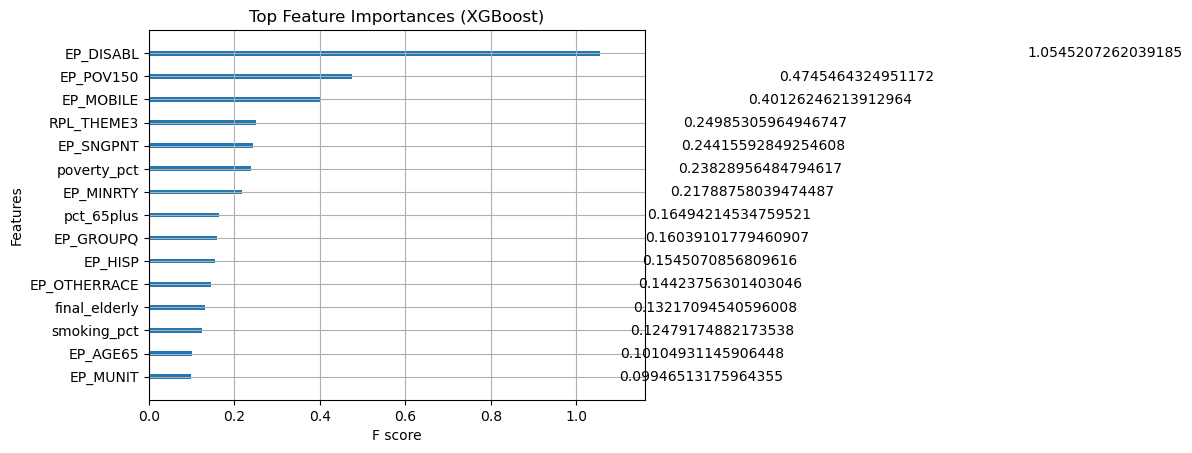

In [24]:
def run_xgboost(master_df, target_col="Case_Fatality_Ratio", random_state=42):
    df = master_df.dropna(subset=[target_col]).select_dtypes(include=[np.number]).copy()
    X = df.drop(columns=[target_col])
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )

    def adjusted_r2(r2, n, p):
        if n - p - 1 <= 0:
            return np.nan
        return 1 - (1 - r2) * (n - 1) / (n - p - 1)

    xgb = XGBRegressor(objective="reg:squarederror", random_state=random_state)

    param_grid = {
        "n_estimators": [500, 1000],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [2, 3, 5],
        "subsample": [0.7, 0.9, 1.0],
        "colsample_bytree": [0.7, 0.9, 1.0],
        "reg_alpha": [0, 0.1, 1],
        "reg_lambda": [1, 5, 10],
    }

    xgb_grid = GridSearchCV(xgb, param_grid, cv=5, scoring="r2", n_jobs=-1, verbose=1)
    xgb_grid.fit(X_train, y_train)
    best_xgb = xgb_grid.best_estimator_

    r2_test = best_xgb.score(X_test, y_test)
    r2_train = best_xgb.score(X_train, y_train)
    adj_r2 = adjusted_r2(r2_train, X_train.shape[0], X_train.shape[1])
    cv_r2 = cross_val_score(best_xgb, X, y, cv=5, scoring="r2").mean()

    print("\n--- XGBoost ---")
    print(f"Test R²: {r2_test:.4f}")
    print(f"Adjusted R² (train): {adj_r2:.4f}")
    print(f"Mean CV R²: {cv_r2:.4f}")
    print(f"Best Params: {xgb_grid.best_params_}")

    plt.figure(figsize=(10,6))
    plot_importance(best_xgb, importance_type="gain", max_num_features=15)
    plt.title("Top Feature Importances (XGBoost)")
    plt.show()

    return best_xgb, xgb_grid.best_params_

best_xgb_model, best_xgb_params = run_xgboost(master_df, target_col="Case_Fatality_Ratio")



## Model Comparison Overview  

We evaluated a range of models to predict **Case Fatality Ratio (CFR)**.  

### Models tested:  
- **Univariate Regressions** (Linear, Quadratic, Exponential, Logarithmic, Logistic/S-curve)  
  - Explored each feature independently.  
  - Best fits were Quadratic and Logistic for *EP_DISABL*, showing non-linear relationships.  

- **Ridge & ElasticNet**  
  - Linear models with L2/L1 regularization.  
  - Moderate results, limited by feature multicollinearity and linear assumption.  

- **PCA + Ridge**  
  - Reduced dimensionality to 20 principal components (explaining ~97.9% variance).  
  - Boosted performance (Test R² ≈ 0.64).  

- **ElasticNet + Ridge Hybrid**  
  - Used ElasticNet for feature selection → Ridge refit.  
  - Strong balance with Test R² ≈ 0.668, Adjusted R² ≈ 0.548.  

- **Support Vector Regression (SVR)**  
  - Captured non-linear patterns.  
  - Optimized SVR achieved Test R² ≈ 0.707 (highest), CV R² ≈ 0.598.  
  - Indicates CFR has meaningful **non-linear dependencies** on features.  

- **Gradient Boosting / XGBoost**  
  - Tree-based ensembles.  
  - Overfit in training (Adjusted R² very high), weaker test performance (R² ~0.49–0.58).  
  - Suggests instability due to dataset size/feature structure.  

- **Stacking Ensemble**  
  - Combined ElasticNet, SVR, GradientBoosting.  
  - Did not outperform individual SVR — likely due to conflicting model biases.  

### Why these results?  
- Linear models (Ridge, ElasticNet) are limited when relationships are **non-linear**.  
- PCA improved performance by reducing noise/multicollinearity.  
- SVR performed best because **kernel methods capture smooth, non-linear relationships**.  
- Tree-based methods struggled due to small data size and possible overfitting.  


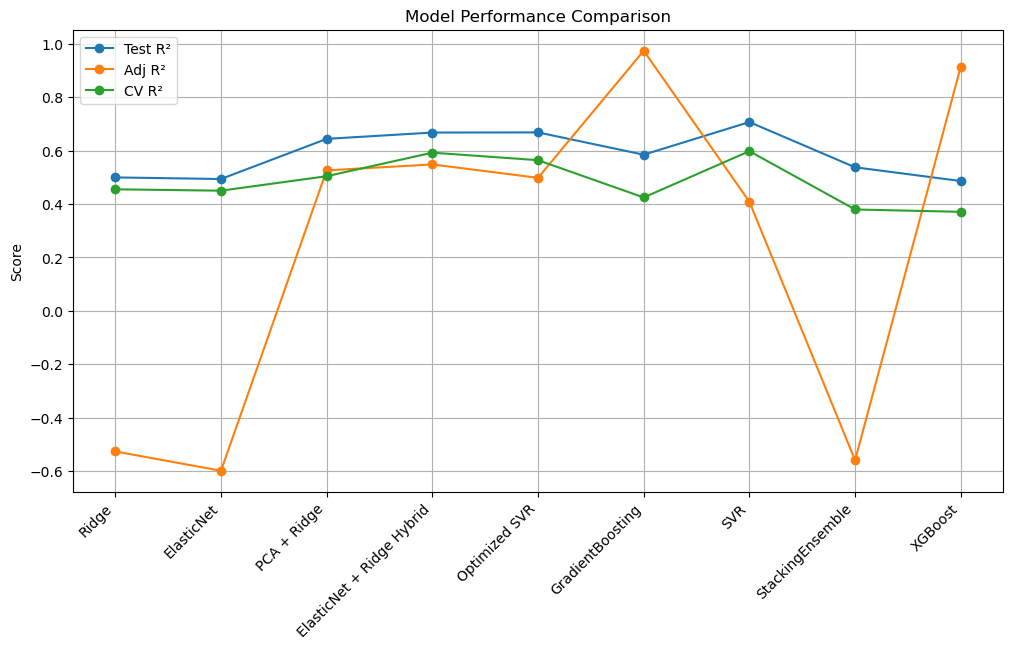

,Model,Test R²,Adj R²,CV R²
0,Ridge,0.4998,-0.5265,0.4553
1,ElasticNet,0.4938,-0.5988,0.4501
2,PCA + Ridge,0.6442,0.5262,0.5043
3,ElasticNet + Ridge Hybrid,0.6678,0.5484,0.5925
4,Optimized SVR,0.6684,0.4982,0.5643
5,GradientBoosting,0.5849,0.9742,0.4247
6,SVR,0.7071,0.4087,0.5981
7,StackingEnsemble,0.5377,-0.5594,0.3797
8,XGBoost,0.4863,0.9142,0.3709


In [25]:
results_summary = pd.DataFrame([
    {"Model": "Ridge", "Test R²": 0.4998, "Adj R²": -0.5265, "CV R²": 0.4553},
    {"Model": "ElasticNet", "Test R²": 0.4938, "Adj R²": -0.5988, "CV R²": 0.4501},
    {"Model": "PCA + Ridge", "Test R²": 0.6442, "Adj R²": 0.5262, "CV R²": 0.5043},
    {"Model": "ElasticNet + Ridge Hybrid", "Test R²": 0.6678, "Adj R²": 0.5484, "CV R²": 0.5925},
    {"Model": "Optimized SVR", "Test R²": 0.6684, "Adj R²": 0.4982, "CV R²": 0.5643},
    {"Model": "GradientBoosting", "Test R²": 0.5849, "Adj R²": 0.9742, "CV R²": 0.4247},
    {"Model": "SVR", "Test R²": 0.7071, "Adj R²": 0.4087, "CV R²": 0.5981},
    {"Model": "StackingEnsemble", "Test R²": 0.5377, "Adj R²": -0.5594, "CV R²": 0.3797},
    {"Model": "XGBoost", "Test R²": 0.4863, "Adj R²": 0.9142, "CV R²": 0.3709},
])

plt.figure(figsize=(12,6))
for metric in ["Test R²", "Adj R²", "CV R²"]:
    plt.plot(results_summary["Model"], results_summary[metric], marker="o", label=metric)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(True)
plt.show()

results_summary

## Best Model: Support Vector Regression (SVR)  

The **SVR with RBF kernel** performed the best:  
- **Test R² = 0.7071 (highest)**  
- **Cross-validated R² = 0.5981** → strong generalization  
- Adjusted R² shows it explains variance reasonably well without overfitting.  

### Why SVR?  
- Captures **non-linear patterns** in CFR.  
- Performs better than linear models (Ridge/ElasticNet) which assume straight-line effects.  
- More stable than tree-based ensembles (GB/XGBoost) that overfit in small datasets.  

Next, we visualize **SVR predictions vs actual CFR** to show its effectiveness.  


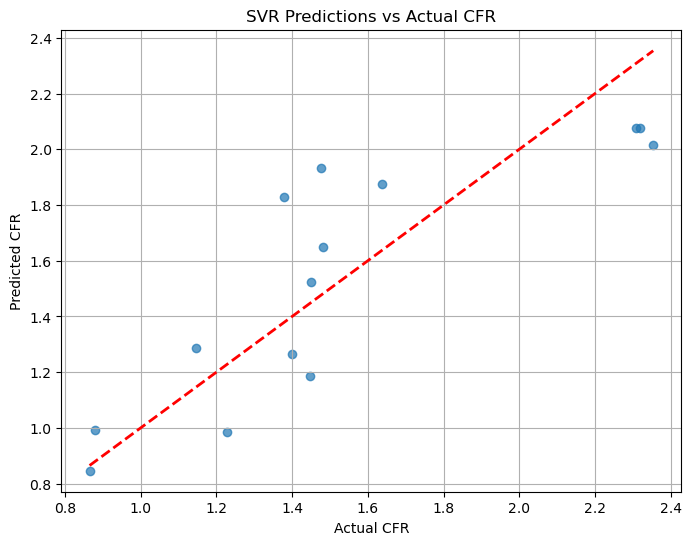

In [26]:
df = master_df.dropna(subset=["Case_Fatality_Ratio"]).select_dtypes(include=[np.number]).copy()
X = df.drop(columns=["Case_Fatality_Ratio"])
y = df["Case_Fatality_Ratio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_svr = SVR(kernel="rbf", C=5.0, epsilon=0.2, gamma=0.01)
best_svr.fit(X_train_scaled, y_train)
y_pred = best_svr.predict(X_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual CFR")
plt.ylabel("Predicted CFR")
plt.title("SVR Predictions vs Actual CFR")
plt.grid(True)
plt.show()


## Important Points to Consider

When interpreting the R² and Adjusted R² results from our models, there are several critical considerations:

### 1. Train/Test Split vs. Using All Data
- We trained on **80% of the data** and tested on the remaining **20%** (≈13 counties).  
- This ensures the model is evaluated on **unseen data**, which is essential for checking whether the model **generalizes** rather than simply memorizes.  
- If we used **all 67 counties** for both training and testing, the R² would likely be **much higher**, but this would not reflect true predictive ability. It would only measure how well the model fits the existing sample (in-sample fit), not how well it would perform on new or future data.

### 2. Small Dataset (67 Counties)
- With only 67 counties in Florida, our dataset is **very small** for machine learning.  
- Each data point represents a whole county, so we only have **one row per county**, not multiple observations over time.  
- Small datasets make it easier for models to overfit, harder to detect subtle patterns, and limit the ceiling of achievable R² values.

### 3. Nature of the Target (Case Fatality Ratio, CFR)
- CFR is influenced by many complex, unobserved factors:  
  - Reporting differences between counties  
  - Timing of outbreaks  
  - Access to healthcare, beyond just bed counts  
  - Behavioral and policy interventions  
- Since our dataset doesn’t capture all of these, the **models are inherently limited** in how well they can explain variance in CFR.

### 4. Adjusted R² vs. R²
- **R²** tells us how much variance in CFR is explained by the model.  
- **Adjusted R²** penalizes models for using too many features relative to sample size.  
- With only 67 observations, adding features can artificially inflate R², which is why Adjusted R² is an important check against overfitting.

### 5. Cross-Validation for Reliability
- To reduce bias from a single train/test split, we also used **cross-validation (CV)**, which rotates through different train/test splits.  
- This gives a more stable estimate of performance, but scores are still somewhat variable due to the small dataset size.

---

### Key Takeaway
- While our models achieve R² values around **0.64–0.71** at best, this reflects **out-of-sample predictive performance**.  
- If we fit and tested on all the data, R² could be higher, but that would **misrepresent the true generalization ability**.  
- With only 67 counties and one data point per county, the ceiling on achievable R² is naturally limited.  
- The real value of this exercise is in comparing methods (linear, hybrid, SVR, boosting, XGBoost) and demonstrating **responsible evaluation**, not in chasing the absolute highest R².
